In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.61G/5.61G [01:04<00:00, 176MB/s]
100% 5.61G/5.61G [01:04<00:00, 93.8MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile("/content/urbansound8k.zip",'r') # open the zip file in read mode
zip.extractall("/content")
zip.close()

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.models import load_model


# **Librosa library is used for audio processing in python.**



In [6]:
import librosa
import IPython.display as idp

In [7]:
df=pd.read_csv('/content/UrbanSound8K.csv')
df.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [33]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [8]:
dat1, sampling_rate1 = librosa.load('/content/fold5/102547-3-0-2.wav')
dat2, sampling_rate2 = librosa.load('/content/fold5/100263-2-0-3.wav')


### **The librosa.load function returns a tuple where the first element (dat1) is the audio data as a one-dimensional NumPy array, and the second element (sampling_rate1) is the sampling rate of the audio.**

Actually, we perform sampling and quantization and bit depth operation on analog signal amplitude value at the rate of sampling rate and then we get discrete values of amplitude which we store into numpy array and this way we can represent sound wave digitally.


Sure, let's break it down into simpler terms:

When we want to turn a sound into something a computer can understand, we use a process called sampling. It's like taking tiny snapshots of the sound at regular intervals. Then, we measure the height of these snapshots, which represents the loudness of the sound. This measurement is called the amplitude.

Now, instead of having a smooth curve of sound, we have a bunch of points that tell us how loud the sound is at different moments. But, we need to simplify these measurements because computers like things to be neat and tidy.

So, we use quantization, which is like rounding off these measurements to the nearest simple number. Think of it like rounding a number to the nearest whole number instead of having lots of decimal places.

The bit depth is related to how much detail we want to keep. It's like deciding how many different shades of color we want to use to represent the loudness. A higher bit depth means more shades and more accuracy.

After all these steps, we store these simplified measurements in a special computer-friendly list, which we call a numpy array. This array represents the digital version of the sound wave, and the computer can use it for various tasks like playing the sound or analyzing it in different ways.

## Representation of sound in the form of images

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

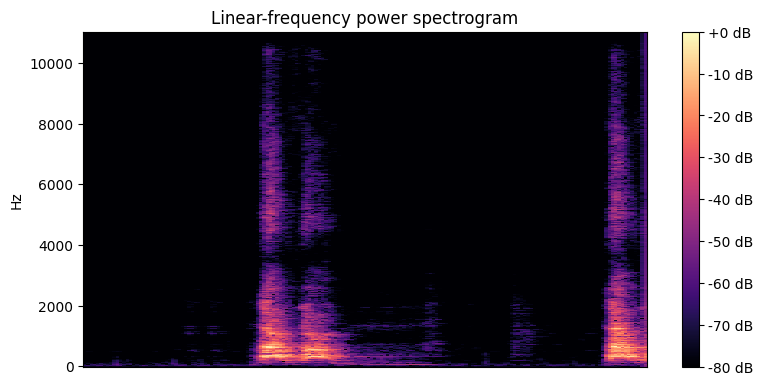

In [9]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

STFT Working image


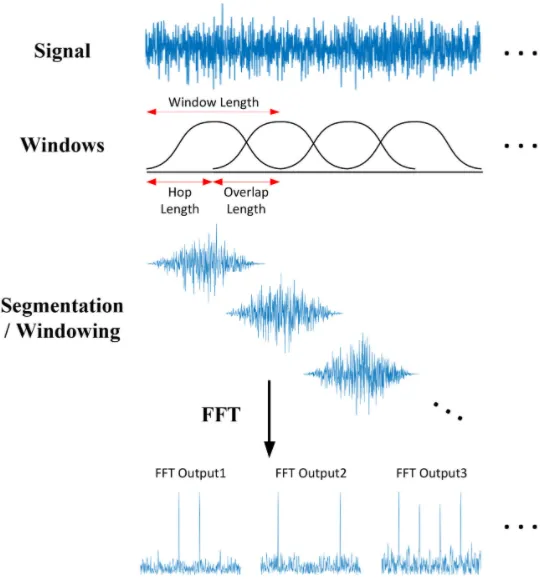

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

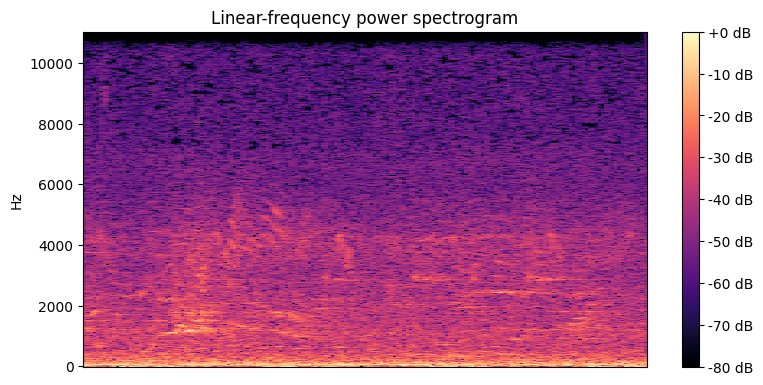

In [10]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

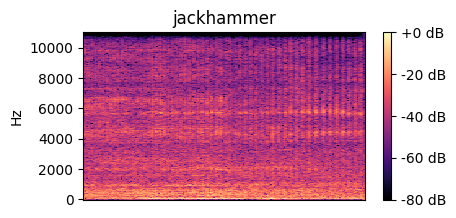

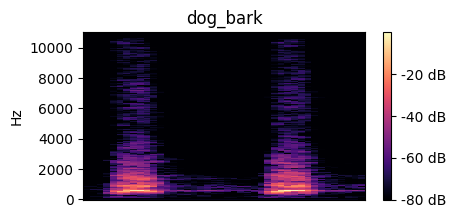

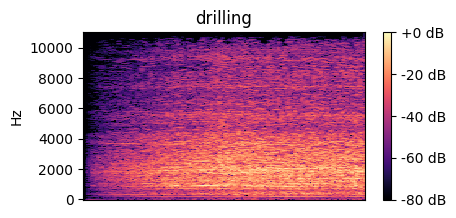

In [11]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = '../content/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 10))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

## Main Code starts

In [12]:
audio_dataset_path = '/content/'

 n_mfcc refers to the number of coefficients to be calculated. Each coefficient represents different aspects of the audio signal's spectral characteristics. The n_mfcc parameter specifies how many of these coefficients you want to compute. The choice of the number of MFCC coefficients depends on the specific application and the balance between capturing enough information to characterize the signal and keeping the computational cost manageable.

In [13]:
  X = []
  y = []
  up_width = 173
  up_height = 40
  for data in df.iterrows():
      file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(data[1][5])+'/',str(data[1][0]))
      raw , sr = librosa.load(file_name)
      X_ = librosa.feature.mfcc(y=raw, sr=sr, n_mfcc=40)
      up_points = (up_width, up_height)
      X_ = cv2.resize(X_, up_points, interpolation= cv2.INTER_LINEAR)
      X.append(X_)
      y.append(data[1][7])


STFT is more general-purpose and can be used for various audio analysis tasks.
MFCCs are specifically tailored for applications where the focus is on capturing characteristics related to human perception, such as in speech and music analysis.

The formula to convert linear frequency

f to mel frequency

m is typically given by the following equation:

m
=
2595
⋅
log
⁡
10
(
1
+
f/
700
)

In this equation:
f is the linear frequency.
m is the corresponding mel frequency.

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
print(X.shape)
print(y.shape)


(8732, 40, 173)
(8732,)


In [17]:
y = to_categorical(le.fit_transform(y))
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

print("X Shape is: ", X.shape)
print("y Shape is: ", y.shape)



X Shape is:  (8732, 40, 173, 1)
y Shape is:  (8732, 10)


The LabelEncoder is used to convert categorical class labels (strings or any other type) into integers.
It assigns a unique integer to each unique class label. For example, if you have class labels 'cat', 'dog', and 'bird', the LabelEncoder might assign integers 0, 1, and 2, respectively. The to_categorical function from Keras is then used to convert the integer-encoded class labels into one-hot encoded vectors.
It takes the integer-encoded array (integer_encoded) and returns a binary matrix representation of the input, where each row corresponds to a sample and each column corresponds to a class.

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

INPUTSHAPE = (up_height,up_width,1)


In [19]:
model =  models.Sequential([

                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(256 , activation = 'relu'),
                          layers.Dense(10 , activation = 'softmax')
])
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = 'acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 171, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 86, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 84, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 42, 128)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 9, 42, 128)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 40, 128)        1

In [20]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

history = model.fit(X_train,y_train ,
            validation_data=(X_test,y_test),
            epochs=20,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/20
874/874 [==============================] - 21s 7ms/step - loss: 1.5454 - acc: 0.4613 - val_loss: 1.2648 - val_acc: 0.5363
Epoch 2/20
874/874 [==============================] - 8s 9ms/step - loss: 0.9575 - acc: 0.6713 - val_loss: 0.8556 - val_acc: 0.7018
Epoch 3/20
874/874 [==============================] - 6s 7ms/step - loss: 0.7239 - acc: 0.7529 - val_loss: 0.6732 - val_acc: 0.7773
Epoch 4/20
874/874 [==============================] - 7s 8ms/step - loss: 0.5802 - acc: 0.8043 - val_loss: 0.5857 - val_acc: 0.7974
Epoch 5/20
874/874 [==============================] - 7s 8ms/step - loss: 0.4840 - acc: 0.8321 - val_loss: 0.4513 - val_acc: 0.8586
Epoch 6/20
874/874 [==============================] - 6s 7ms/step - loss: 0.4227 - acc: 0.8570 - val_loss: 0.4969 - val_acc: 0.8340
Epoch 7/20
874/874 [==============================] - 8s 9ms/step - loss: 0.3831 - acc: 0.8710 - val_loss: 0.4239 - val_acc: 0.8638
Epoch 8/20
874/874 [==============================] - 6s 7ms/step - loss: 0

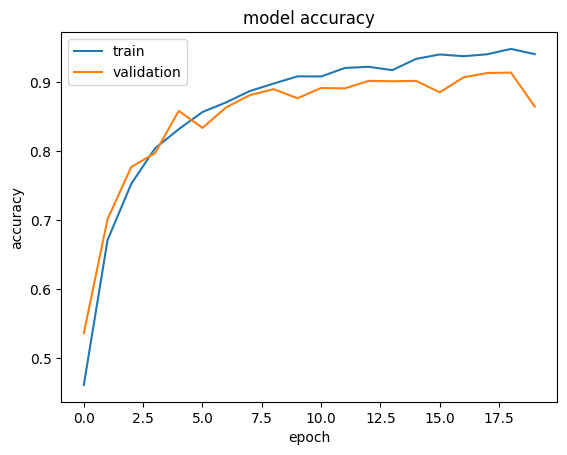

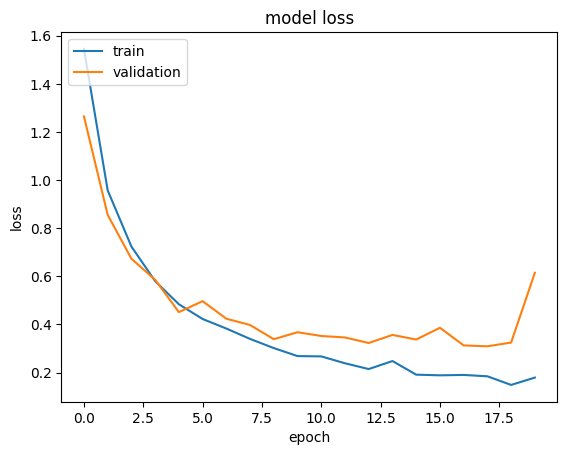

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [23]:
def features_extract(file):
    sample,sample_rate = librosa.load(file)
    feature = librosa.feature.mfcc(y=sample,sr=sample_rate,n_mfcc=40)
    up_points = (up_width, up_height)
    scaled_feature= cv2.resize(feature, up_points, interpolation= cv2.INTER_LINEAR)
    scaled_feature=scaled_feature.reshape(1,40,173,1)
    return scaled_feature

The inverse_transform method in scikit-learn's LabelEncoder is used to convert back the integer-encoded or label-encoded predictions into their original class labels.

In [24]:
def print_prediction(file_name):
    pred_fea = features_extract(file_name)
    pred_vector = np.argmax(model.predict(pred_fea), axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The predicted class is:", pred_class[0], '\n')

In [29]:
import IPython.display as ipd
print_prediction('/content/fold8/103076-3-2-0.wav')
ipd.Audio('/content/fold8/103076-3-2-0.wav')


1/1 [==============================] - 0s 35ms/step
The predicted class is: dog_bark 



In [30]:
model.save('content/audio_classification.h5')

In [27]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       203
           1       0.95      0.90      0.92        86
           2       0.91      0.64      0.75       183
           3       0.75      0.94      0.84       201
           4       0.92      0.77      0.84       206
           5       0.84      0.98      0.90       193
           6       0.93      0.88      0.90        72
           7       0.86      0.94      0.90       208
           8       0.91      0.94      0.92       165
           9       0.87      0.74      0.80       230

    accuracy                           0.86      1747
   macro avg       0.88      0.87      0.87      1747
weighted avg       0.87      0.86      0.86      1747



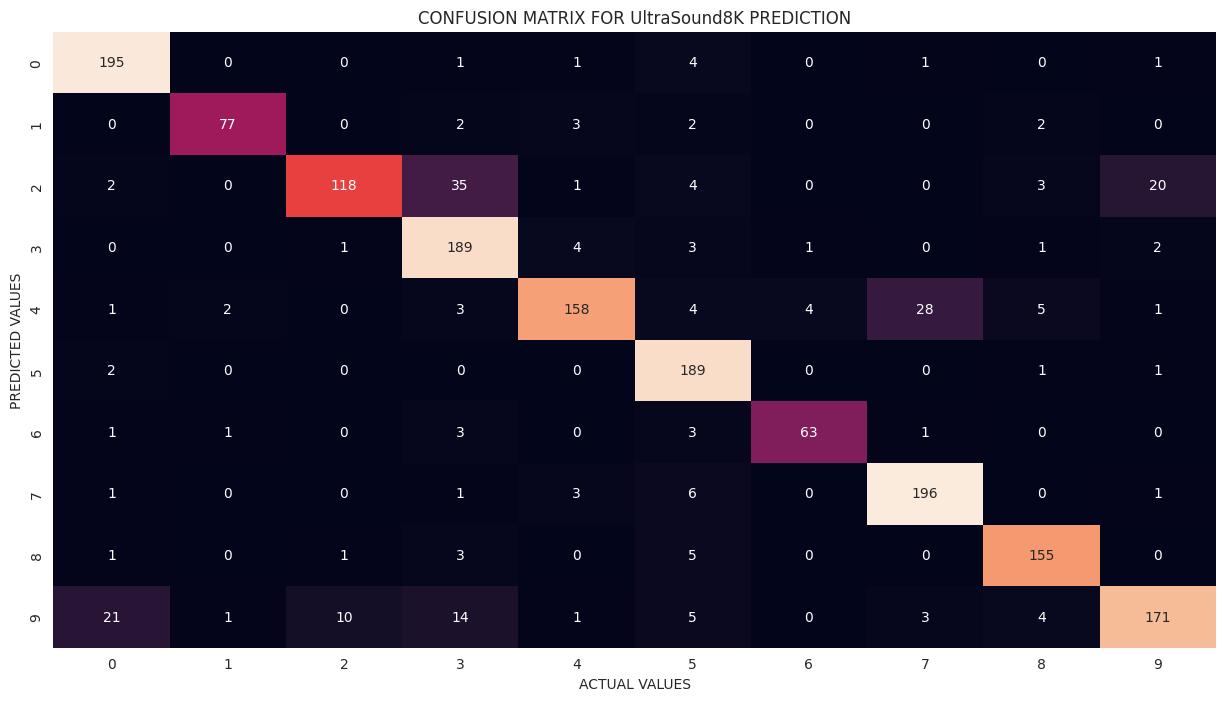

In [28]:
sns.set_style("dark")
plt.figure(figsize=(15,8))
plt.title("CONFUSION MATRIX FOR UltraSound8K PREDICTION")
cm = confusion_matrix([int(x) for x in y_test],Y_pred)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")
plt.show()